# **M1: Bag of Words**

In [19]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

paragraph = """The news mentioned here is fake. Audience do notencourage fake news.
Fake news is false or misleading"""
sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(sentences)):
  sent = re.sub('[^a-zA-Z]', ' ', sentences[i])
  sent = sent.lower()
  sent= sent.split()
  sent = [lemmatizer.lemmatize(word) for word in sent if word not in set(stopwords.words('english'))]
  sent = ' '.join(sent)
  corpus.append(sent)
print(corpus)

['news mentioned fake', 'audience notencourage fake news', 'fake news false misleading']


In [12]:
#Step 2: List all unique words
unique_words = []
for sent in corpus:
  for word in sent.split():
    if word not in unique_words:
      unique_words.append(word)

print(unique_words)

['news', 'mentioned', 'fake', 'audience', 'notencourage', 'false', 'misleading']


In [19]:
#Step 3: Create a dictionary with mapping of words to a number.This should now be sortedon frequency of occurrence in descending order.
import pandas as pd

words = ['fake', 'news', 'fake', 'audience', 'encourage', 'false', 'mentioned',
         'misleading', 'news', 'fake', 'news']

word_freq = {}
for word in words:
    word_freq[word] = word_freq.get(word, 0) + 1

df = pd.DataFrame({
    'Vector (Number)': range(len(word_freq)),
    'Words': list(word_freq.keys()),
    'Frequency': list(word_freq.values())
})

print(df)

   Vector (Number)       Words  Frequency
0                0        fake          3
1                1        news          3
2                2    audience          1
3                3   encourage          1
4                4       false          1
5                5   mentioned          1
6                6  misleading          1


In [20]:
#Step 4: create a table in each sentence, for the presence of each word in the dictionary,assign ‘1’ else assign ‘0’
import pandas as pd

sentences = [
    "The news mentioned here is fake.",
    "Audience do notencourage fake news.",
    "Fake news is false or misleading."
]

target_words = ["news", "audience", "false", "encourage", "mentioned", "misleading"]

data = []

for sent in sentences:
  row = {"Sentence": sent, "Value": 1}
  words = sent.split()
  for word in target_words:
    row[f"# ({word})"]= int(word in words)
  data.append(row)

df = pd.DataFrame(data)
print(df)

                              Sentence  Value  # (news)  # (audience)  \
0     The news mentioned here is fake.      1         1             0   
1  Audience do notencourage fake news.      1         0             0   
2    Fake news is false or misleading.      1         1             0   

   # (false)  # (encourage)  # (mentioned)  # (misleading)  
0          0              0              1               0  
1          0              0              0               0  
2          1              0              0               0  


# **Term Frequency - Inverse Document Frequency (TF-IDF)**

In [21]:
#Step 1: Passing the data through stemming or lemmatization. Take all the unique words, andsort based on frequency of occurrence. These are steps 1,2,3 we have observed in Bag ofwords (BOW)
import pandas as pd

words = ['fake', 'news', 'fake', 'audience', 'encourage', 'false', 'mentioned', 'misleading', 'news', 'fake', 'news']

word_freq = {}
for word in words:
    word_freq[word] = word_freq.get(word, 0) + 1

df = pd.DataFrame({
    'Vector (Number)': range(len(word_freq)),
    'Words': list(word_freq.keys()),
    'Frequency': list(word_freq.values())
})

print(df)

   Vector (Number)       Words  Frequency
0                0        fake          3
1                1        news          3
2                2    audience          1
3                3   encourage          1
4                4       false          1
5                5   mentioned          1
6                6  misleading          1


In [22]:
#Step 2: Calculate Term Frequency
import pandas as pd
sentences = [
    "news mentioned fake",
    "audience encourage fake news",
    "fake news false misleading"
]
target_words = ["news", "mentioned", "fake", "encourage", "audience", "false", "misleading"]
data = []

for sent in sentences:
    words = sent.split()
    total_words = len(words)
    tf_row = {"Sentence": sent}
    for word in target_words:
        tf = words.count(word) / total_words
        tf_row[word] = round(tf, 2)
    data.append(tf_row)

df = pd.DataFrame(data)
print(df)

                       Sentence  news  mentioned  fake  encourage  audience  \
0           news mentioned fake  0.33       0.33  0.33       0.00      0.00   
1  audience encourage fake news  0.25       0.00  0.25       0.25      0.25   
2    fake news false misleading  0.25       0.00  0.25       0.00      0.00   

   false  misleading  
0   0.00        0.00  
1   0.00        0.00  
2   0.25        0.25  


In [1]:
#Step 3: Calculate IDF
import pandas as pd
import math
sentences = [
    "news mentioned fake",
    "audience encourage fake news",
    "fake news false misleading"
]

target_words = ["news", "mentioned", "fake", "audience", "encourage", "false", "misleading"]
N = len(sentences)

idf_scores = {}
for word in target_words:
    doc_count = sum(1 for sent in sentences if word in sent.split())
    idf = math.log(N / doc_count) if doc_count > 0 else 0
    idf_scores[word] = round(idf, 3)

df = pd.DataFrame({
    'Word': list(idf_scores.keys()),
    'IDF': list(idf_scores.values())
})
print(df)

         Word    IDF
0        news  0.000
1   mentioned  1.099
2        fake  0.000
3    audience  1.099
4   encourage  1.099
5       false  1.099
6  misleading  1.099


In [1]:
#Step 4: Calculate document vectors multiplying TF and  IDF values
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "news mentioned fake",
    "audience encourage fake news",
    "fake news false misleading"
]

tfidf = TfidfVectorizer()

independentFeatures_tfIDF = tfidf.fit_transform(corpus).toarray()

print("Feature Names:", tfidf.get_feature_names_out())
print("TF-IDF Matrix:\n", independentFeatures_tfIDF)

Feature Names: ['audience' 'encourage' 'fake' 'false' 'mentioned' 'misleading' 'news']
TF-IDF Matrix:
 [[0.         0.         0.45329466 0.         0.76749457 0.
  0.45329466]
 [0.6088451  0.6088451  0.35959372 0.         0.         0.
  0.35959372]
 [0.         0.         0.35959372 0.6088451  0.         0.6088451
  0.35959372]]


# **M2: BAG OF WORDS**

In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
#Step 1: Preprocessing the Text
import nltk
import re
text = """Beans. I was trying to explain to somebody as we were flying in, that's
corn. That's beans. And they were very impressed at my agricultural knowledge.
Please give it up for Amaury once again for that outstanding introduction. I have
a bunch of good friends here today, including somebody who I served with, who is
one of the finest senators in the country, and we're lucky to have him, your
Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar
here, who I haven't seen in a long time, and somehow he has not aged and I have.
And it's great to see you, Governor. I want to thank President Killeen and
everybody at the U of I System for making it possible for me to be here today.
And I am deeply honored at the Paul Douglas Award that is being given to me. He
is somebody who set the path for so much outstanding public service here in
Illinois. Now, I want to start by addressing the elephant in the room. I know
people are still wondering why I didn't speak at the commencement."""
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
  dataset[i] = dataset[i].lower()
  dataset[i] = re.sub(r'\W', ' ', dataset[i])
  dataset[i] = re.sub(r'\s+', ' ', dataset[i])

for i, sentence in enumerate(dataset):
  print(f"Sentence {i+1}: {sentence}")

Sentence 1: beans 
Sentence 2: i was trying to explain to somebody as we were flying in that s corn 
Sentence 3: that s beans 
Sentence 4: and they were very impressed at my agricultural knowledge 
Sentence 5: please give it up for amaury once again for that outstanding introduction 
Sentence 6: i have a bunch of good friends here today including somebody who i served with who is one of the finest senators in the country and we re lucky to have him your senator dick durbin is here 
Sentence 7: i also noticed by the way former governor edgar here who i haven t seen in a long time and somehow he has not aged and i have 
Sentence 8: and it s great to see you governor 
Sentence 9: i want to thank president killeen and everybody at the u of i system for making it possible for me to be here today 
Sentence 10: and i am deeply honored at the paul douglas award that is being given to me 
Sentence 11: he is somebody who set the path for so much outstanding public service here in illinois 
Sente

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
#Step 2: Counting Word Frequencies
import pandas as pd
from nltk.corpus import stopwords
import nltk

word2count = {}
for data in dataset:
  words = nltk.word_tokenize(data)
  for word in words:
    if word not in word2count:
      word2count[word] = 1
    else:word2count[word] += 1

stop_words = set(stopwords.words('english'))
filtered_word2count = {word: count for word, count in word2count.items() if word not in stop_words}
word_freq_df = pd.DataFrame(list(filtered_word2count.items()), columns=['Word','Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
print(word_freq_df)

            Word  Frequency
3       somebody          3
0          beans          2
17         today          2
12   outstanding          2
41          want          2
..           ...        ...
67        people          1
68         still          1
69     wondering          1
70         speak          1
71  commencement          1

[72 rows x 2 columns]


Top 10 frequent words: ['i', 'the', 'to', 'and', 'in', 'for', 'here', 'that', 'at', 'who']


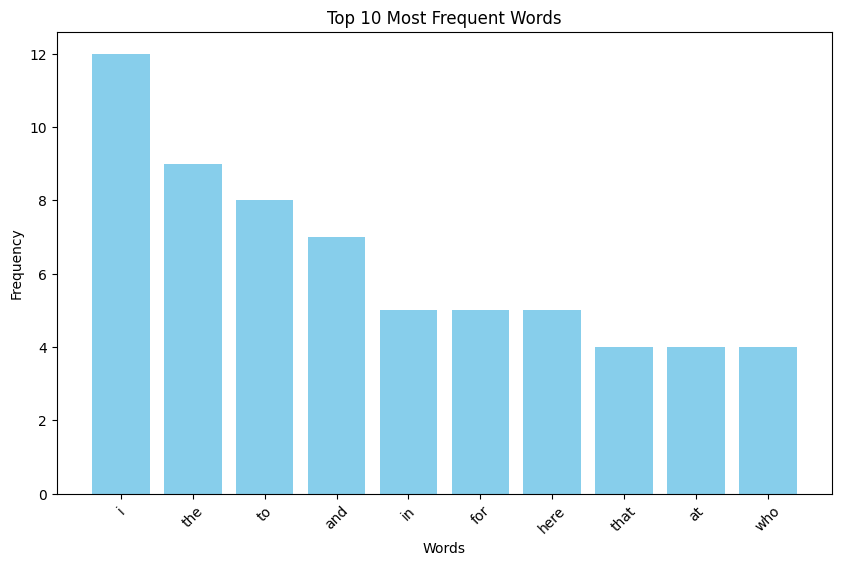

In [11]:
#Step 3: Selecting the Most Frequent Words
import heapq
import matplotlib.pyplot as plt
freq_words = heapq.nlargest(10, word2count, key=word2count.get)
print(f"Top 10 frequent words: {freq_words}")
top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

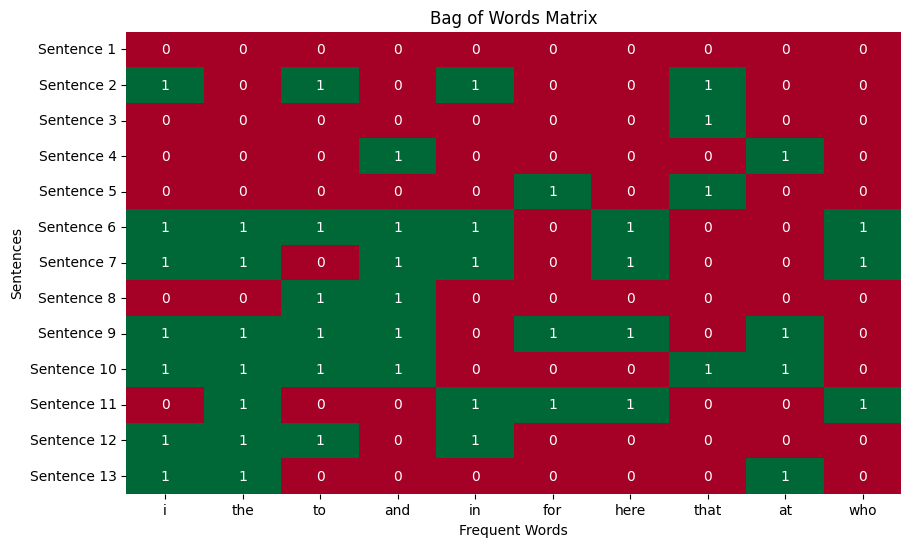

In [12]:
#Step 4: Building the Bag of Words (BoW) Model
import numpy as np
import seaborn as sns
X = []
for data in dataset:
  vector = []
  for word in freq_words:
    if word in nltk.word_tokenize(data):
       vector.append(1)
    else:
        vector.append(0)
  X.append(vector)
X = np.asarray(X)
plt.figure(figsize=(10, 6))
sns.heatmap(X, cmap='RdYlGn', cbar=False, annot=True, fmt="d",
xticklabels=freq_words, yticklabels=[f"Sentence {i+1}"
for i in range(len(dataset))])

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()

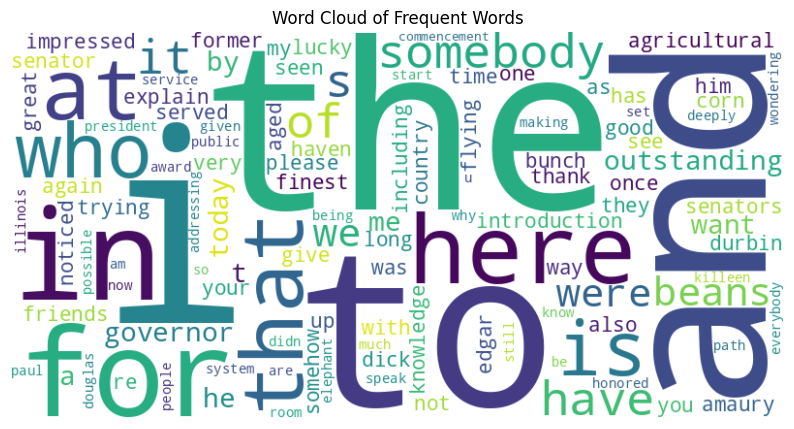

In [13]:
#Step 5: Visualizing Word Frequencies with a Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word2count)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()

# **M2: One Hot Encoding in Machine Learning**

In [15]:
#Implementing One-Hot Encoding Using Python
#1. Using Pandas
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}
df = pd.DataFrame(data)
print(f"Original Employee Data:\n{df}\n")
df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'],drop_first=True)

print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

# Using Scikit-Learn
categorical_columns = ['Gender', 'Remarks']
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,
columns=encoder.get_feature_names_out(categorical_columns))

df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df],axis=1)

print(f"One-Hot Encoded Data using Scikit-Learn:\n{df_sklearn_encoded}\n")

Original Employee Data:
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice

One-Hot Encoded Data using Pandas:
   Employee id  Gender_M  Remarks_Great  Remarks_Nice
0           10      True          False         False
1           20     False          False          True
2           15     False          False         False
3           25      True           True         False
4           30     False          False          True

One-Hot Encoded Data using Scikit-Learn:
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4   

In [16]:
#2: One Hot Encoding using Scikit Learn Library
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'],
        }
df = pd.DataFrame(data)
print(f"Employee data : \n{df}")

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{df_encoded}")

Employee data : 
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice
Encoded Employee data : 
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           30       1.0       0.0           0.0            0.0           1.0


# **M2:Understanding TF-IDF (Term Frequency-Inverse Document Frequency)**

In [17]:
#Implementing TF-IDF in Python
from sklearn.feature_extraction.text import TfidfVectorizer
d0 = 'Geeks for geeks'
d1 = 'Geeks'
d2 = 'r2j'
string = [d0, d1, d2]

tfidf = TfidfVectorizer()
result = tfidf.fit_transform(string)

print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
  print(ele1, ':', ele2)

print('\nWord indexes:')
print(tfidf.vocabulary_)
print('\ntf-idf value:')
print(result)
print('\ntf-idf values in matrix form:')
print(result.toarray())


idf values:
for : 1.6931471805599454
geeks : 1.2876820724517808
r2j : 1.6931471805599454

Word indexes:
{'geeks': 1, 'for': 0, 'r2j': 2}

tf-idf value:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 1)	0.8355915419449176
  (0, 0)	0.5493512310263033
  (1, 1)	1.0
  (2, 2)	1.0

tf-idf values in matrix form:
[[0.54935123 0.83559154 0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]


In [21]:
#Develop BoW
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample paragraph
paragraph = "The news mentioned here is fake. Audience do notencourage fake news. Fake news is false or misleading"

# Step 1: Preprocess the text
sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(sentences)):
    sent = re.sub('[^a-zA-Z]', ' ', sentences[i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lemmatizer.lemmatize(word) for word in sent if word not in set(stopwords.words('english'))]
    sent = ' '.join(sent)
    corpus.append(sent)

# Step 2: Create a list of all unique words
unique_words = []
for sent in corpus:
    for word in sent.split():
        if word not in unique_words:
            unique_words.append(word)

# Step 3: Create the Bag of Words matrix
data = []
for sent in corpus:
    row = {}
    words = sent.split()
    for word in unique_words:
        row[word] = words.count(word)
    data.append(row)

# Create a DataFrame for better visualization
bow_df = pd.DataFrame(data, index=[f'Sentence {i+1}' for i in range(len(sentences))]).fillna(0).astype(int)
print("Bag of Words Matrix:")
print(bow_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Bag of Words Matrix:
            news  mentioned  fake  audience  notencourage  false  misleading
Sentence 1     1          1     1         0             0      0           0
Sentence 2     1          0     1         1             1      0           0
Sentence 3     1          0     1         0             0      1           1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
#Develop TF-IDF
import pandas as pd
import math

# Sample sentences (assumed to be preprocessed)
sentences = [
    "news mentioned fake",
    "audience notencourage fake news",
    "fake news false misleading"
]

# Step 1: Calculate Term Frequency (TF)
target_words = sorted(list(set(word for sent in sentences for word in sent.split())))
tf_data = []
for sent in sentences:
    words = sent.split()
    total_words = len(words)
    tf_row = {}
    for word in target_words:
        tf = words.count(word) / total_words
        tf_row[word] = round(tf, 3)
    tf_data.append(tf_row)
tf_df = pd.DataFrame(tf_data, index=[f'Sentence {i+1}' for i in range(len(sentences))])
print("Term Frequency (TF) Matrix:")
print(tf_df)

# Step 2: Calculate Inverse Document Frequency (IDF)
N = len(sentences)
idf_scores = {}
for word in target_words:
    doc_count = sum(1 for sent in sentences if word in sent.split())
    idf = math.log(N / doc_count) if doc_count > 0 else 0
    idf_scores[word] = round(idf, 3)
idf_df = pd.DataFrame([idf_scores])
print("\nInverse Document Frequency (IDF) Scores:")
print(idf_df)

# Step 3: Calculate TF-IDF
tfidf_data = tf_df.multiply(idf_df.iloc[0], axis=1)
print("\nTF-IDF Matrix:")
print(tfidf_data)

Term Frequency (TF) Matrix:
            audience   fake  false  mentioned  misleading   news  notencourage
Sentence 1      0.00  0.333   0.00      0.333        0.00  0.333          0.00
Sentence 2      0.25  0.250   0.00      0.000        0.00  0.250          0.25
Sentence 3      0.00  0.250   0.25      0.000        0.25  0.250          0.00

Inverse Document Frequency (IDF) Scores:
   audience  fake  false  mentioned  misleading  news  notencourage
0     1.099   0.0  1.099      1.099       1.099   0.0         1.099

TF-IDF Matrix:
            audience  fake    false  mentioned  misleading  news  notencourage
Sentence 1   0.00000   0.0  0.00000   0.365967     0.00000   0.0       0.00000
Sentence 2   0.27475   0.0  0.00000   0.000000     0.00000   0.0       0.27475
Sentence 3   0.00000   0.0  0.27475   0.000000     0.27475   0.0       0.00000
